C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


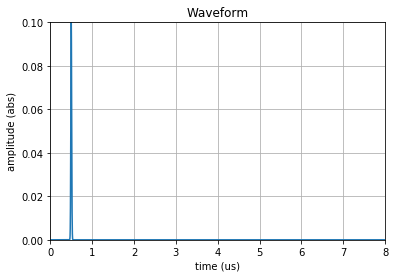

In [2]:
%reload_ext autoreload
%autoreload 2

import broadbean as bb
import matplotlib.pyplot as plt
import numpy as np

dur = 8E-6
pulseAmpl = 100E-3
pulseWidth = 10E-9
timeoffset = 500E-9
SR = 2.5E9
npts = dur*SR

# waveform = bb.PulseAtoms.sine(freq=2*SR/npts, ampl=pulseAmpl, off=0, phase=0, SR=SR, npts=npts)
# waveform = bb.PulseAtoms.ramp(start=0, stop=pulseAmpl, SR=SR, npts=npts)
waveform = bb.PulseAtoms.gaussian(ampl=pulseAmpl, sigma=pulseWidth, mu=timeoffset-dur/2, offset=0, SR=SR, npts=npts)
time = np.linspace(0, npts/SR, npts, endpoint=False)

xscale = 1E-6
plt.plot(time/xscale, waveform)
plt.title('Waveform')
plt.grid(True)
plt.xlim(0/xscale, dur/xscale)
plt.xlabel("time (us)")
plt.ylim(0, pulseAmpl)
plt.ylabel("amplitude (abs)")
plt.show()
plt.close()

In [ ]:
%load_ext autoreload
%autoreload 2 #the code reload import model everytime
%matplotlib notebook

from qcodes.instrument.base import Instrument
try:
    Instrument.close_all()
except KeyError:
    pass
except NameError:
    pass

from qcodes.instrument_drivers.tektronix.AWG5208 import AWG5208
awg = AWG5208('awg', 'TCPIP::169.254.106.135::INSTR')

In [ ]:
fs = waveform
seqname = 'mytestseq'
amplitudes = [ch.awg_amplitude() for ch in awg.channels][:2]
channel_mapping = {'trigger_channel': 2, 'signal_channel': 1}
seqx_file = AWG5208.makeSEQXFileFromForgedSequence(fs,
                                                   amplitudes=amplitudes,
                                                   seqname=seqname,
                                                   channel_mapping=channel_mapping)
# load it and assign its tracks to the channels
filename = 'gaussianTest.seqx'

awg.clearSequenceList()
awg.clearWaveformList()
awg.sendSEQXFile(seqx_file, filename=filename)
awg.loadSEQXFile(filename)
awg.ch1.setSequenceTrack(seqname, 1)
awg.ch2.setSequenceTrack(seqname, 2)